# To find using Univariate Linear Regression:- 
1) Relationship between water salinity and water temperature.                                                                   
2) Prediction of water temperature based on salinity.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [101]:
data=pd.read_csv('bottle.csv')
data.head(3)

c:\users\ksht1\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
len(data.columns)

74

In [103]:
print(data.describe())
print('--------------------')
print(data.info())

             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587269     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.3600

# Our main variables are salinity and T_degC. So lets focus on them only 

In [104]:
data1=data.iloc[:,5:7]
#x=data.iloc[:,5] #Water temperature
#y=data.iloc[:,6] #Water Salinity
data1.head(3)

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437


In [105]:
print(len(data1))
print('----------------------')
print(data1.isna().sum())

864863
----------------------
T_degC    10963
Salnty    47354
dtype: int64


In [106]:
#Filling of null values for variable T_degC
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data1.iloc[:,0:1])
data1.iloc[:,0:1]=imputer.transform(data1.iloc[:,0:1])

In [107]:
#Filling of null values for variable Salnty
imputer.fit(data1.iloc[:,1:2])
data1.iloc[:,1:2]=imputer.transform(data1.iloc[:,1:2])

In [108]:
print(len(data1))
print('----------------------')
print(data1.isna().sum())

864863
----------------------
T_degC    0
Salnty    0
dtype: int64


In [109]:
x=data1.iloc[:,0:1] #Water temperature
y=data1.iloc[:,-1] #Water Salinity

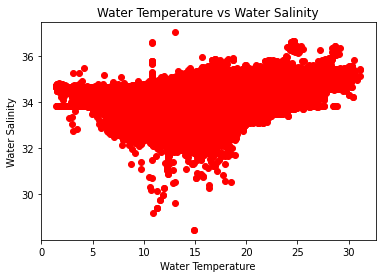

In [110]:
plt.scatter(x,y,color='red')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.title('Water Temperature vs Water Salinity')
plt.show()

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=143)

In [112]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [113]:
print(regression.intercept_)
print(regression.coef_)
y_pred=regression.predict(x_test)

34.403281566471065
[-0.05214079]


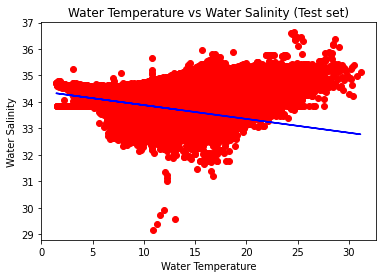

In [114]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("Water Temperature vs Water Salinity (Test set)")
plt.xlabel("Water Temperature")
plt.ylabel("Water Salinity")
plt.show()

In [115]:
cv_score = cross_val_score(regression, x, y, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.18169533988973718


In [120]:
MSE=round(mean_squared_error(y_test,y_pred),3)
MAE=round(mean_absolute_error(y_test,y_pred),3)
print("Mean Squared Error is:- {}".format(MSE))
print("Mean Absolute Error is:- {}".format(MAE))

Mean Squared Error is:- 0.153
Mean Absolute Error is:- 0.277


In [117]:
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)

SGDRegressor()

In [118]:
score = sgdr.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.20982840291878257


In [119]:
cv1_score = cross_val_score(sgdr, x, y, cv = 10)
print("CV mean score: ", cv1_score.mean())

CV mean score:  0.1732667638284775


In [121]:
Y_pred=sgdr.predict(x_test)

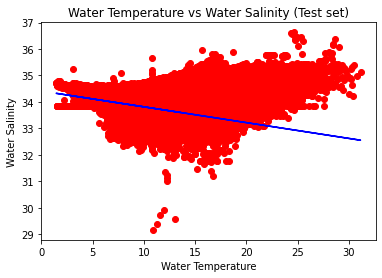

In [123]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,Y_pred,color='blue')
plt.title("Water Temperature vs Water Salinity (Test set)")
plt.xlabel("Water Temperature")
plt.ylabel("Water Salinity")
plt.show()

In [124]:
MSE=round(mean_squared_error(y_test,Y_pred),3)
MAE=round(mean_absolute_error(y_test,Y_pred),3)
print("Mean Squared Error is:- {}".format(MSE))
print("Mean Absolute Error is:- {}".format(MAE))

Mean Squared Error is:- 0.159
Mean Absolute Error is:- 0.278


In [131]:
water_temperature=np.array(10.46)
prediction=regression.predict(water_temperature.reshape(-1,1))
prediction1=sgdr.predict(water_temperature.reshape(-1,1))
print("The level of water salinity at water temperature 10.46 degree centigrate would be {}".format(prediction))
print("The level of water salinity at water temperature 10.46 degree centigrate would be {}".format(prediction1))

The level of water salinity at water temperature 10.46 degree centigrate would be [33.85788892]
The level of water salinity at water temperature 10.46 degree centigrate would be [33.78958207]
